## Instaling tensorflow

In [4]:
!pip install tensorflow

## Convolutional Neural Network (CNN)

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

class FashionMNISTModel:
    def __init__(self):
        # Load and preprocess the dataset
        (self.x_train, self.y_train), (self.x_test, self.y_test) = fashion_mnist.load_data()
        
        # Normalize the images to the range [0, 1]
        self.x_train = self.x_train.astype('float32') / 255.0
        self.x_test = self.x_test.astype('float32') / 255.0
        
        # Reshape the images to include the channel dimension
        self.x_train = self.x_train.reshape(-1, 28, 28, 1)
        self.x_test = self.x_test.reshape(-1, 28, 28, 1)
        
        # Convert labels to one-hot encoded vectors
        self.y_train = to_categorical(self.y_train, 10)
        self.y_test = to_categorical(self.y_test, 10)
        
        # Initialize the model
        self.model = self.build_model()

    def build_model(self):
        # Define the CNN model architecture
        model = Sequential()

        # Layer 1: Convolutional layer
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

        # Layer 2: Convolutional layer
        model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

        # Layer 3: Max pooling layer
        model.add(MaxPooling2D(pool_size=(2, 2)))

        # Layer 4: Dropout layer to reduce overfitting
        model.add(Dropout(0.25))

        # Layer 5: Flatten layer to reshape the tensor for the fully connected layers
        model.add(Flatten())

        # Layer 6: Fully connected (dense) layer
        model.add(Dense(128, activation='relu'))

        # Output layer: Fully connected (dense) layer with softmax activation
        model.add(Dense(10, activation='softmax'))

        # Compile the model
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
        return model

    def train_model(self, epochs=10, batch_size=128):
        # Train the model
        self.model.fit(self.x_train, self.y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

    def evaluate_model(self):
        # Evaluate the model on the test set
        test_loss, test_accuracy = self.model.evaluate(self.x_test, self.y_test)
        print(f'Test accuracy: {test_accuracy:.4f}')
        print(f'Test loss: {test_loss:.4f}')

if __name__ == '__main__':
    # Instantiate the model
    fashion_mnist_model = FashionMNISTModel()

    # Train the model
    fashion_mnist_model.train_model(epochs=10, batch_size=128)

    # Evaluate the model
    fashion_mnist_model.evaluate_model()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 10us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step


C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 84ms/step - accuracy: 0.7796 - loss: 0.6449 - val_accuracy: 0.8925 - val_loss: 0.3133
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.8940 - loss: 0.2975 - val_accuracy: 0.8998 - val_loss: 0.2735
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.9117 - loss: 0.2422 - val_accuracy: 0.9143 - val_loss: 0.2405
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 35s 93ms/step - accuracy: 0.9257 - loss: 0.2008 - val_accuracy: 0.9225 - val_loss: 0.2173
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 35s 92ms/step - accuracy: 0.9368 - loss: 0.1706 - val_accuracy: 0.9197 - val_loss: 0.2240
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.9467 - loss: 0.1479 - val_accuracy: 0.9217 - val_loss: 0.2164
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.9549 - loss: 0.1259 - val_accuracy: 0.9224 - val_loss: 0.2273
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 100ms/step - accuracy: 0.9617 - loss: 0.1065 -

In [6]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Loading the datasets and splitting into test and train sets

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
# Checking the shape of the datasets
train_images.shape

(60000, 28, 28)

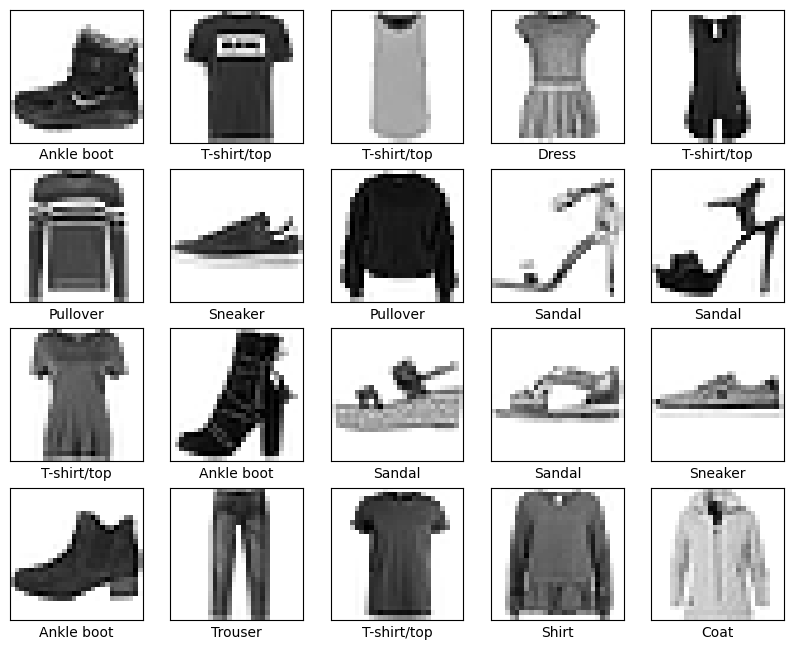

In [9]:
# Scaling the values to a range of 0 to 1 before feeding to the neural network model

train_images = train_images / 255.0

test_images = test_images / 255.0

# Display the first 20 images from the training set 

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Prediction

Epoch 1/10


C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 77ms/step - accuracy: 0.7791 - loss: 0.6264 - val_accuracy: 0.8867 - val_loss: 0.3171
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.8917 - loss: 0.3012 - val_accuracy: 0.8913 - val_loss: 0.2884
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.9097 - loss: 0.2471 - val_accuracy: 0.9096 - val_loss: 0.2460
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.9262 - loss: 0.2055 - val_accuracy: 0.9168 - val_loss: 0.2274
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.9340 - loss: 0.1796 - val_accuracy: 0.9192 - val_loss: 0.2305
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 88ms/step - accuracy: 0.9438 - loss: 0.1512 - val_accuracy: 0.9211 - val_loss: 0.2311
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.9525 - loss: 0.1310 - val_accuracy: 0.9151 - val_loss: 0.2411
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 88ms/step - accuracy: 0.9599 - loss: 0.1117 - val_accurac

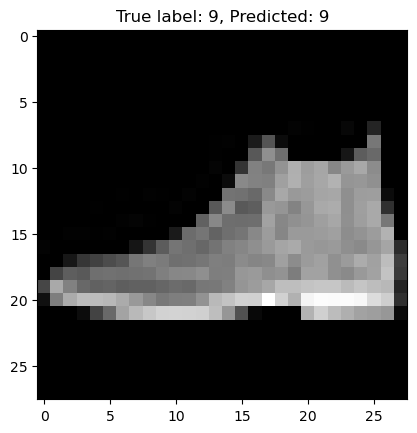

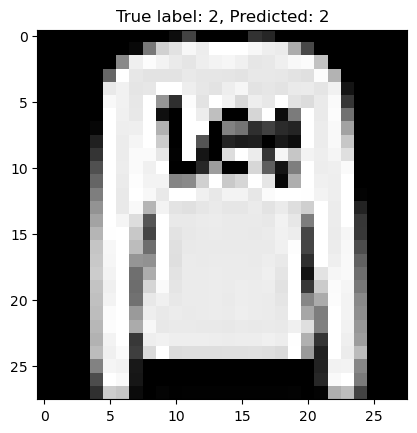

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

class FashionMNISTModel:
    def __init__(self):
        # Load and preprocess the dataset
        (self.x_train, self.y_train), (self.x_test, self.y_test) = fashion_mnist.load_data()
        
        # Normalize the images to the range [0, 1]
        self.x_train = self.x_train.astype('float32') / 255.0
        self.x_test = self.x_test.astype('float32') / 255.0
        
        # Reshape the images to include the channel dimension
        self.x_train = self.x_train.reshape(-1, 28, 28, 1)
        self.x_test = self.x_test.reshape(-1, 28, 28, 1)
        
        # Convert labels to one-hot encoded vectors
        self.y_train = to_categorical(self.y_train, 10)
        self.y_test = to_categorical(self.y_test, 10)
        
        # Initialize the model
        self.model = self.build_model()

    def build_model(self):
        # Define the CNN model architecture
        model = Sequential()

        # Layer 1: Convolutional layer
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

        # Layer 2: Convolutional layer
        model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

        # Layer 3: Max pooling layer
        model.add(MaxPooling2D(pool_size=(2, 2)))

        # Layer 4: Dropout layer to reduce overfitting
        model.add(Dropout(0.25))

        # Layer 5: Flatten layer to reshape the tensor for the fully connected layers
        model.add(Flatten())

        # Layer 6: Fully connected (dense) layer
        model.add(Dense(128, activation='relu'))

        # Output layer: Fully connected (dense) layer with softmax activation
        model.add(Dense(10, activation='softmax'))

        # Compile the model
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
        return model

    def train_model(self, epochs=10, batch_size=128):
        # Train the model
        self.model.fit(self.x_train, self.y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

    def evaluate_model(self):
        # Evaluate the model on the test set
        test_loss, test_accuracy = self.model.evaluate(self.x_test, self.y_test)
        print(f'Test accuracy: {test_accuracy:.4f}')
        print(f'Test loss: {test_loss:.4f}')

    def make_predictions(self, num_images=2):
        # Make predictions for a few images from the test set
        predictions = self.model.predict(self.x_test[:num_images])
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = np.argmax(self.y_test[:num_images], axis=1)
        
        for i in range(num_images):
            plt.imshow(self.x_test[i].reshape(28, 28), cmap='gray')
            plt.title(f'True label: {true_classes[i]}, Predicted: {predicted_classes[i]}')
            plt.show()

if __name__ == '__main__':
    # Instantiate the model
    fashion_mnist_model = FashionMNISTModel()

    # Train the model
    fashion_mnist_model.train_model(epochs=10, batch_size=128)

    # Evaluate the model
    fashion_mnist_model.evaluate_model()

    # Make predictions for a few images
    fashion_mnist_model.make_predictions(num_images=2)